In [2]:
#q1 - what's the total size in bytes of the files requested?
from zipfile import ZipFile
import pandas as pd

with ZipFile("server_log.zip") as f:
    df = pd.read_csv(f.open('rows.csv'))
int(sum(df['size']))

24801002666

In [3]:
#q2 - how many filings have been accessed by the top ten IPs?
df['ip'].value_counts()[:10].to_dict()

{'54.152.17.ccg': 12562,
 '183.195.251.hah': 6524,
 '52.45.218.ihf': 5562,
 '68.180.231.abf': 5493,
 '204.212.175.bch': 4708,
 '103.238.106.gif': 4428,
 '208.77.215.jeh': 3903,
 '208.77.214.jeh': 3806,
 '217.174.255.dgd': 3551,
 '82.13.163.caf': 3527}

In [4]:
#q3 - what fraction of the requests had errors?
errors = []
for error in df['code']:
    if error >= 400:
        errors.append(error)
len(errors) / len(df)

0.03466852724527611

In [5]:
#q4 - what is the most frequently accessed file?
filepath = []
for row in df.itertuples():
    filepath.append(str(int(row.cik)) + "/" + row.accession + "/" + row.extention)
df['filepath'] = pd.Series(filepath)
files_accessed = df['filepath'].value_counts().to_dict()
list(files_accessed.keys())[0]

'1627631/0001627631-15-000004/.txt'

In [6]:
#q5 - how many requests were made by automated crawlers?
int(sum(df['crawler']))

971

In [7]:
import edgar_utils

regions = []
visited = []
for ip in df['ip']:
    if ip not in visited:
        visited.append(ip)
        regions.append(edgar_utils.lookup_region(ip))
regions_series = pd.Series(regions)

In [8]:
#q6 - which region uses EDGAR most heavily?
ips_per_region = regions_series.value_counts().to_dict()
list(ips_per_region.keys())[0]

'United States of America'

In [9]:
# df['region'] = df['ip'].apply(edgar_utils.lookup_region)

In [10]:
#q7 - what fraction of IPs in each region are high-volume users?
ip_dict = df['ip'].value_counts().to_dict()

locations_of_high_vol = []
for ip in ip_dict:
    if ip_dict[ip] > 1000:
        locations_of_high_vol.append(edgar_utils.lookup_region(ip))
        
locations_of_high_vol_dict = pd.Series(locations_of_high_vol).value_counts().to_dict()

# dict joining by key adapted from 
# https://favtutor.com/blogs/merge-dictionaries-python#:~:text=The%20simplest%20way%20to%20merge,collection%20of%20key%2Dvalue%20pairs.
comparison = {**ips_per_region, **locations_of_high_vol_dict}
for key, value in comparison.items():
    if key in ips_per_region and key in locations_of_high_vol_dict:
        comparison[key] = [value , ips_per_region[key]]

for key, value in comparison.items():
    if type(value) != list:
        comparison[key] = 0.0
    else:
        comparison[key] = value[0] / value[1]
comparison

{'United States of America': 0.019862490450725745,
 'China': 0.006864988558352402,
 'France': 0.0036900369003690036,
 'Canada': 0.017857142857142856,
 'United Kingdom of Great Britain and Northern Ireland': 0.06666666666666667,
 'Germany': 0.0,
 'India': 0.058823529411764705,
 'Hong Kong': 0.0,
 'Netherlands': 0.0,
 'Ireland': 0.3125,
 'Israel': 0.0,
 'Australia': 0.07692307692307693,
 'Italy': 0.0,
 'Japan': 0.0,
 'Korea (Republic of)': 0.2,
 'Ukraine': 0.0,
 'Romania': 0.0,
 'Taiwan (Province of China)': 0.0,
 'Singapore': 0.0,
 'Switzerland': 0.0,
 'Russian Federation': 0.0,
 'Thailand': 0.0,
 'Viet Nam': 0.0,
 'Spain': 0.0,
 'South Africa': 0.0,
 'Poland': 0.0,
 'Egypt': 0.0,
 'Sweden': 0.0,
 'Brazil': 0.0,
 'Denmark': 0.0,
 'Slovakia': 0.0,
 'Philippines': 0.0,
 'Malaysia': 0.0,
 'Iraq': 0.0,
 'Saudi Arabia': 0.0,
 'Indonesia': 0.0,
 'Estonia': 0.0,
 'Turkey': 0.0,
 'Bulgaria': 0.3333333333333333,
 'Czechia': 0.0,
 'Portugal': 0.0,
 'Lebanon': 0.0,
 '-': 0.0,
 'Hungary': 0.0,
 'Au

In [11]:
#q8 - what dates appear in the 850693/0000850693-07-000159/-index.htm file of docs.zip?
docszip_filing = {}
with ZipFile('docs.zip') as zipf:
    for file in zipf.namelist():
        if file.endswith("htm") or file.endswith("html"):
            with zipf.open(file) as f:
                file_html = str(f.read(), encoding="utf-8")
                filing = edgar_utils.Filing(file_html)
                docszip_filing[file] = filing
docszip_filing["850693/0000850693-07-000159/-index.htm"].dates

['2007-07-25', '2007-07-25', '2007-07-23']

In [12]:
#q9 - what is the distribution of states for the filings in docs.zip?
state_dist = {}
for val in docszip_filing.values():
    state = val.state()
    if state != None:
        if state not in state_dist:
            state_dist[state] = 1
        else:
            state_dist[state] += 1
dict(sorted(state_dist.items(), key=lambda item: item[1], reverse = True))

{'CA': 91,
 'NY': 83,
 'TX': 64,
 'MA': 30,
 'CO': 25,
 'IL': 25,
 'PA': 25,
 'NJ': 23,
 'FL': 21,
 'VA': 15,
 'MN': 15,
 'CT': 14,
 'MD': 13,
 'MI': 11,
 'OH': 10,
 'DE': 10,
 'NC': 9,
 'WI': 9,
 'GA': 8,
 'OK': 7,
 'OX': 6,
 'NV': 6,
 'IA': 6,
 'UT': 5,
 'KS': 5,
 'AZ': 5,
 'IN': 4,
 'TN': 4,
 'MO': 4,
 'WA': 3,
 'KY': 2,
 'NE': 2,
 'LA': 2,
 'OR': 2,
 'WV': 2,
 'MS': 1,
 'AL': 1,
 'SD': 1,
 'NM': 1,
 'AR': 1,
 'VT': 1,
 'ID': 1,
 'DC': 1,
 'ME': 1}

In [13]:
#q10 - what is the distribution of SIC codes for the filings in docs.zip?
sic_dist = {}
for val in docszip_filing.values():
    sic_val = val.sic
    if sic_val != None:
        if sic_val not in sic_dist:
            sic_dist[sic_val] = 1
        else:
            sic_dist[sic_val] += 1
sic_dist

{2834: 40,
 6022: 20,
 1311: 20,
 6189: 17,
 6211: 17,
 8731: 2,
 1389: 19,
 7370: 7,
 3571: 1,
 7361: 1,
 3674: 5,
 4931: 5,
 1040: 2,
 2810: 2,
 7389: 11,
 3140: 1,
 7374: 4,
 6200: 1,
 7381: 1,
 3620: 3,
 3841: 6,
 4941: 1,
 5621: 1,
 7330: 1,
 6199: 8,
 6798: 20,
 2510: 4,
 3990: 2,
 1700: 5,
 7371: 6,
 5940: 2,
 4522: 5,
 1731: 2,
 6311: 2,
 8082: 2,
 2836: 13,
 6021: 20,
 1000: 11,
 4911: 8,
 6324: 2,
 8051: 1,
 6035: 4,
 3550: 1,
 4813: 4,
 6321: 2,
 2890: 1,
 3845: 2,
 2860: 8,
 1221: 2,
 3669: 2,
 6411: 1,
 5900: 2,
 2320: 1,
 6221: 3,
 6331: 10,
 2070: 1,
 8742: 5,
 3829: 3,
 900: 5,
 5500: 2,
 7372: 11,
 6770: 1,
 4841: 2,
 4833: 1,
 7384: 1,
 6799: 3,
 3826: 5,
 8711: 2,
 5160: 1,
 5944: 1,
 3420: 3,
 3510: 3,
 5960: 1,
 3842: 4,
 8062: 3,
 6029: 11,
 7320: 1,
 5172: 2,
 1382: 2,
 3663: 4,
 1400: 3,
 7822: 1,
 2024: 1,
 2080: 1,
 7812: 2,
 4922: 2,
 2030: 1,
 3576: 3,
 2711: 1,
 3578: 1,
 3679: 2,
 2842: 1,
 4899: 1,
 100: 1,
 3541: 1,
 7311: 1,
 3317: 1,
 2033: 1,
 3721: 1

In [14]:
#q11 - what is the distribution of requests across industries?
across_dict = {}
for file in df['filepath']:
    for key in docszip_filing:
        if key == file:
            sic = docszip_filing[key].sic
            if sic != None:
                if sic not in across_dict:
                    across_dict[sic] = 1
                else:
                    across_dict[sic] += 1
dict(sorted(across_dict.items(), key=lambda item: item[1], reverse = True))

{2834: 984,
 1389: 656,
 1311: 550,
 2836: 429,
 6022: 379,
 1000: 273,
 6211: 237,
 7371: 229,
 2860: 226,
 6021: 204,
 6282: 171,
 2510: 171,
 3825: 164,
 4841: 108,
 5621: 99,
 7200: 94,
 7374: 94,
 6331: 91,
 6798: 90,
 5311: 90,
 3842: 87,
 6221: 85,
 6029: 83,
 3272: 81,
 3829: 73,
 4931: 70,
 3510: 66,
 7830: 62,
 3826: 56,
 3695: 55,
 3620: 50,
 7373: 48,
 6799: 46,
 4412: 43,
 4512: 42,
 7340: 40,
 7370: 39,
 900: 39,
 6513: 38,
 3621: 38,
 5172: 36,
 5900: 35,
 4213: 35,
 3990: 34,
 5122: 34,
 5944: 33,
 2070: 33,
 8090: 32,
 1700: 31,
 3312: 31,
 1381: 31,
 4922: 31,
 6324: 30,
 8742: 27,
 7389: 26,
 8731: 25,
 7812: 25,
 3590: 24,
 4955: 23,
 3663: 23,
 4522: 22,
 6321: 21,
 3559: 20,
 5812: 19,
 6792: 19,
 6189: 18,
 7372: 16,
 3841: 14,
 6199: 11,
 1731: 11,
 4911: 8,
 4833: 7,
 6035: 7,
 3571: 6,
 2430: 6,
 3679: 5,
 3674: 5,
 4813: 4,
 3678: 4,
 4812: 4,
 1531: 4,
 5500: 4,
 6411: 3,
 1400: 3,
 2800: 3,
 3420: 3,
 8062: 3,
 3576: 3,
 2870: 2,
 1040: 2,
 8711: 2,
 3669: 

In [15]:
#q12 - how many requests were made in each hour?
times = list(pd.to_datetime(df['time']))
time_dist = {}
for timestamp in times:
    if timestamp.hour not in time_dist:
        time_dist[timestamp.hour] = 1
    else:
        time_dist[timestamp.hour] += 1
time_dist

{0: 8305,
 1: 8242,
 2: 8550,
 3: 8850,
 4: 8343,
 5: 9783,
 6: 7761,
 7: 8213,
 8: 8292,
 9: 11033,
 10: 6377,
 11: 6435,
 12: 6155,
 13: 6006,
 14: 6654,
 15: 6512,
 16: 5680,
 17: 6487,
 18: 6356,
 19: 6211,
 20: 6066,
 21: 6164,
 22: 6098,
 23: 6283}

In [16]:
from graphviz import Digraph
states_by_region = {}
for row in df.itertuples():
    region = edgar_utils.lookup_region(row.ip)
    for file in docszip_filing:
        if row.filepath == file:
            states = docszip_filing[file].state()
            if region == "Australia" or region == "France" or region == "Viet Nam":
                curr_state = states_by_region.get(region, set())
                curr_state.add(states)
                states_by_region[region] = curr_state

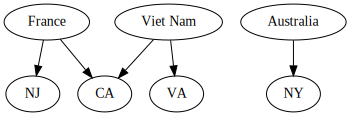

In [17]:
#q13 - what is the geographic overlap in interest between Australia, France, and Viet Nam?
g = Digraph()
for region in states_by_region:
    g.node(region)
    for state in states_by_region[region]:
        g.node(state)
        g.edge(region, state)
g

In [18]:
#q14 - what are the most commonly seen street addresses?
addresses = []
for file in df['filepath']:
    for key in docszip_filing:
        if key == file:
            addresses.extend(docszip_filing[key].addresses)

address_dist = {}
for v in addresses:
    if v not in address_dist:
        address_dist[v] = 1
    else:
        address_dist[v] += 1

over_225 = {k: v for k, v in address_dist.items() if v >= 225}
dict(sorted(over_225.items(), key=lambda item: item[1], reverse = True))

{'801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102': 720,
 '801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102\n817-334-4100': 464,
 '1114 AVENUE OF THE AMERICAS\n29TH FLOOR\nNEW YORK NY 10036': 356,
 '1 SANSOME ST\n30TH FL\nSAN FRANCISCO CA 94104': 305,
 '10119 W. LARIAT LANE\nPEORIA AZ 85383': 289,
 '10119 W. LARIAT LANE\nPEORIA AZ 85383\n425-442-0931': 289,
 '1881 GROVE AVENUE\nRADFORD VA 24141': 277,
 '1 SANSOME ST\n30TH FL\nSAN FRANCISCO CA 94104\n3125066500': 264,
 '1251 AVENUE OF THE AMERICAS\nNEW YORK NY 10020': 225,
 '1251 AVENUE OF THE AMERICAS\nNEW YORK NY 10020\n212-956-2221': 225,
 '1177 WEST HASTINGS STREET\nSUITE 2300\nVANCOUVER A1 V6E 2K3': 225,
 '1177 WEST HASTINGS STREET\nSUITE 2300\nVANCOUVER A1 V6E 2K3\n604-683-6332': 225}

<AxesSubplot:>

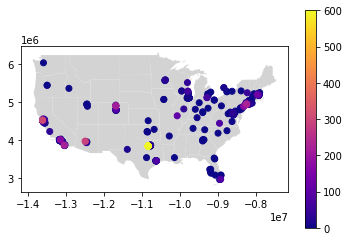

In [19]:
#q15 - geographic plotting of headquarters
import geopandas as gpd
import os
from shapely.geometry import Polygon, box, Point

loc_df = gpd.read_file('locations.geojson')
us_file = os.listdir('shapes')[-1]
us_df = gpd.read_file(os.path.join('shapes', us_file))

loc_df['count'] = loc_df['address'].map(address_dist)
loc_df = loc_df.sort_values(by = "count")

window = box(-130, 20, -55, 50)
loc = loc_df[loc_df.intersects(window) == True]
us = gpd.GeoDataFrame()
us['geometry'] = us_df.intersection(window)

us_fitted = us.to_crs('epsg:3395')
loc_fitted = loc.to_crs('epsg:3395')

ax = us_fitted.plot(color = 'lightgrey')
loc_fitted.plot(ax = ax, column = 'count', cmap = 'plasma', legend = True, vmin = 0, vmax = 600)